<a href="https://colab.research.google.com/github/Introducao-Series-Temporais-em-Python/Book/blob/main/tsp_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [2]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [3]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

In [4]:
#@markdown `tspdecompose()`
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

In [11]:
#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)



# Exemplos `tspsimulate()`

**widgets**



In [12]:
tspsimulate_ts

interactive(children=(IntSlider(value=60, description='nr_months', max=120, min=40), IntSlider(value=1, descri…

Acessando o DataFrame do widget,

In [13]:
ts1.head()

,t,Y,T,S,R
2000-01-31,0,16.620990,1,0.000000,7.207049
2000-02-29,1,19.300764,3,7.053423,0.833400
2000-03-31,2,31.291706,5,11.412678,6.465087
2000-04-30,3,30.029436,7,11.412678,3.202817
2000-05-31,4,26.507194,9,7.053423,2.039830


**Função**

In [15]:
df = tspsimulate() 
df.head()


,t,Y,T,S,R
2000-01-31,0,5.458120,1,0.000000,1.229060
2000-02-29,1,15.814734,3,7.053423,2.532251
2000-03-31,2,20.384922,5,11.412678,0.743184
2000-04-30,3,27.498745,7,11.412678,5.857007
2000-05-31,4,27.902855,9,7.053423,8.620372


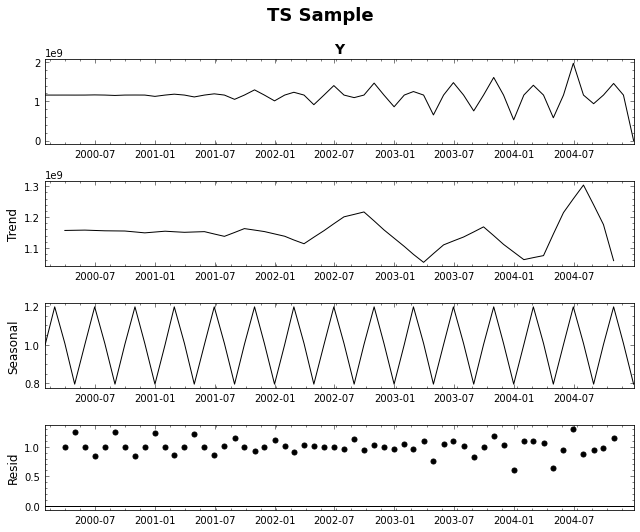

,t,Y,T,S,R
2000-01-31,0,1.156719e+09,-1,0.000000e+00,233.156741
2000-02-29,1,1.156418e+09,-3,4.442667e+02,225.765120
2000-03-31,2,1.156719e+09,-1,5.440698e-14,380.041390
2000-04-30,3,1.156199e+09,5,-4.442667e+02,234.327363
2000-05-31,4,1.156719e+09,15,-1.088140e-13,272.729919


In [21]:
df = tspsimulate(show_plot=True, beta_0=-1, beta_1=-4, beta_2=2, seasons_month_len=4, model='multiplicative', title='TS Sample') 

df.head()

# Exemplos `tspdisplay()`



In [ ]:
df = pd.read_csv(path + 'gas_consumption.csv',index_col=0,parse_dates=True)
df.index = pd.to_datetime(df.index)
df = df[ df.index.year > 1965 ]

url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/UKDriverDeaths.csv'
df2 = pd.read_csv(url, usecols=['time','value'], index_col=['time'])
index_dates = pd.date_range(start='01/01/1969', end='01/01/1985', freq='M')
df2.index = index_dates



In [ ]:
UKDriveDeaths = df2

tspdisplay('UKDriveDeaths')

,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385
1969-05-31,1632


In [ ]:
tspdisplay('df1','df2','df1.diff()')

,gas_consumption
1966-01-01,41542.774
1967-01-01,44643.178
1968-01-01,48791.133
1969-01-01,53682.306
1970-01-01,58537.494
,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385


In [ ]:
display(df.head())
display(df2.head())
display(df.diff().head())

,gas_consumption
1966-01-01,41542.774
1967-01-01,44643.178
1968-01-01,48791.133
1969-01-01,53682.306
1970-01-01,58537.494


,value
1969-01-31,1687
1969-02-28,1508
1969-03-31,1507
1969-04-30,1385
1969-05-31,1632


,gas_consumption
1966-01-01,NaN
1967-01-01,3100.404
1968-01-01,4147.955
1969-01-01,4891.173
1970-01-01,4855.188


# Exemplos `tspplot()`

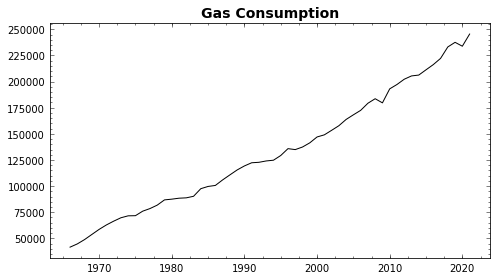

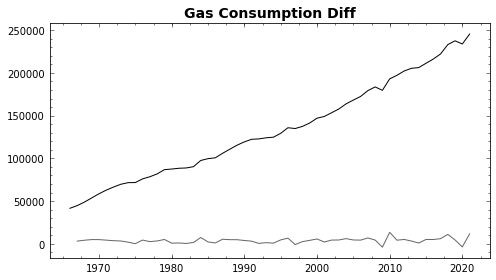

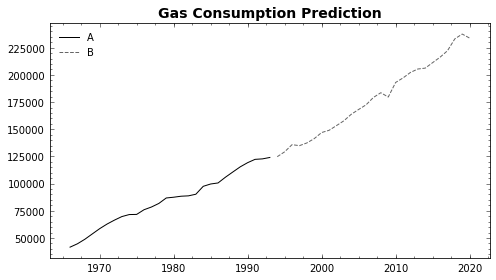

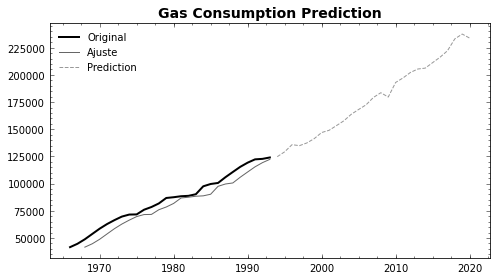

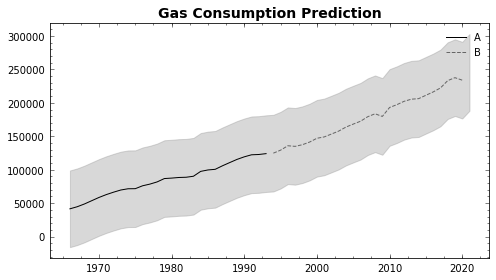

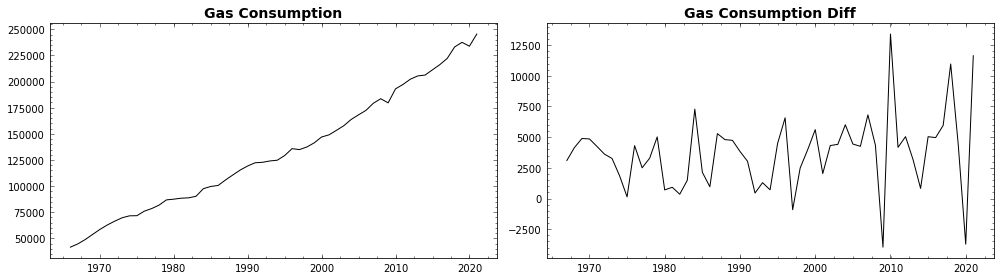

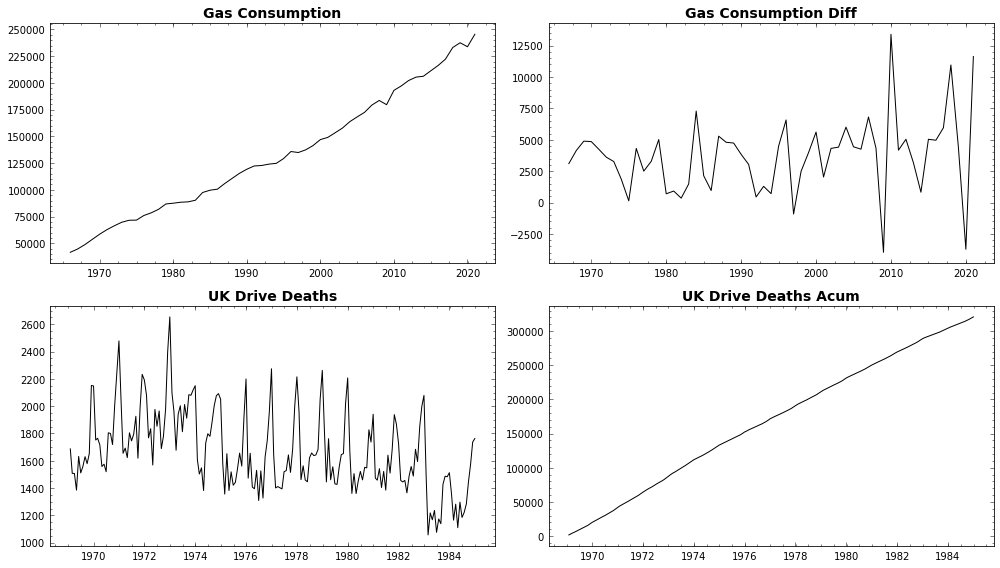

In [ ]:
tspplot(df,title='Gas Consumption')

fig, ax = plt.subplots()
tspplot(df,title='Gas Consumption',ax=ax)
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax)

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='A')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='B')

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='Original',lw=2)
tspplot(df.iloc[0:len(df)//2].shift(2),title='Gas Consumption',ax=ax,label='Ajuste')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='Prediction')

fig, ax = plt.subplots()
tspplot(df.iloc[0:len(df)//2],title='Gas Consumption',ax=ax,label='A')
tspplot(df.iloc[len(df)//2:-1],title='Gas Consumption Prediction',ax=ax,linestyle='dashed',label='B')
ax.fill_between(df.index, df[ df.columns[0] ] - df[ df.columns[0] ].std(),  df[ df.columns[0] ] + df[ df.columns[0] ].std(), color='grey', alpha=.3)
plt.show() # somente aqui você precisa do plt.show() por conta do fill_ antes

fig, ax = plt.subplots(1,2,figsize=(14,4))
tspplot(df,title='Gas Consumption',ax=ax[0])
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax[1])

fig, ax = plt.subplots(2,2,figsize=(14,8))
tspplot(df,title='Gas Consumption',ax=ax[0,0])
tspplot(df.diff(),title='Gas Consumption Diff',ax=ax[0,1])
tspplot(df2,title='UK Drive Deaths',ax=ax[1,0])
tspplot(df2.cumsum(),title='UK Drive Deaths Acum',ax=ax[1,1])


# Exemplos `tspdecompose()`

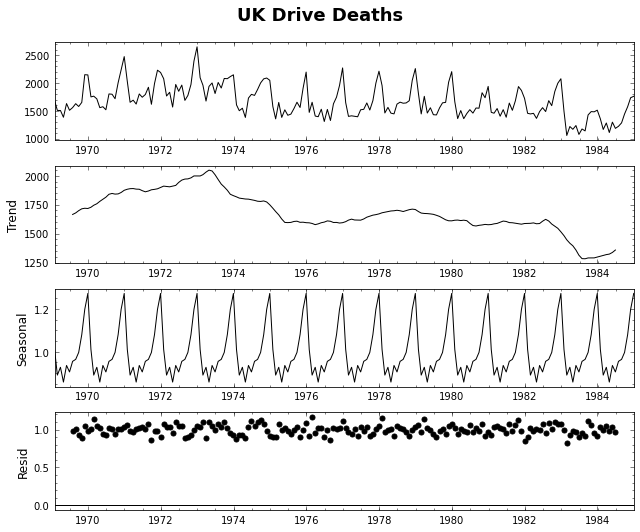

In [ ]:
tspdecompose(df2,title='UK Drive Deaths')